In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib

## LABDOS flights

In [2]:
#PRG-WAW
fto = '/storage/experiments/2023/04_HIMAC/PRG_WAW'
SWITCH_ON_TIMES = ['2023-04-22 7:45']

#WAW-NRT
fto = '/storage/experiments/2023/04_HIMAC/WAW_NRT'
SWITCH_ON_TIMES = ['2023-04-22 13:15']

#NRT-PRG
fto = '/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG'
SWITCH_ON_TIMES = ['2023-04-25 12:45','2023-04-25 12:45']


## Load and plot data from LABDOS

In [3]:
print (fto)

ID = '/LABDOS_EF'
#ID = '/LABDOS_D9'
#ID = '/LABDOS_B8'
#ID = '/LABDOS_20'
#ID = '/LABDOS_8B'
#ID = '/LABDOS_4E'
#ID = '/LABDOS_7E'

l=[]
l.extend(range(0,505))

df = pd.read_csv(fto+ID+'/0.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print('Loaded')

/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG
Loaded


In [4]:
#SWITCH_ON_TIMES = ['2021-9-18 12:00', '2021-9-19 12:00', '2021-9-20 12:00', '2021-9-21 12:00', '2021-9-22 12:00', '2021-9-23 12:00', '2021-9-24 12:00', '2021-9-25 12:00', '2021-9-26 12:00', '2021-9-27 12:00', '2021-9-28 12:00', '2021-9-29 12:00', '2021-9-30 12:00']
#SWITCH_ON_TIMES = ['2023-03-12 18:09']

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df.copy()
#rc = df.iloc[366870:378082,:].copy()
#rc = df.iloc[366683:378082,:].copy()
#rc = df.iloc[366714:378084,:].copy() 

run = 0
rc['run'] = np.nan

try:
    for x in rc.loc[rc[0]=='$DOS'].index:
        rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
        run += 1
except:
    pass
rc['run'].fillna(method="ffill", inplace=True)

pd.set_option('display.max_rows', rc.shape[0]+1)
print(rc.loc[rc[0]=='$DOS'][[0,1,2,3,4,5,6, 'run', 'runtime']])
#print(rc.loc[rc[0]=='$AIRDOS'][[0,1, 'runtime']])
pd.set_option('display.max_rows', 10)

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)

#!!!!!!!!!!!!!!!
#rc = rc.iloc[1:4745]

         0          1   2    3                                         4  \
0     $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   
1     $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   
4745  $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   

            5                                 6               run   runtime  
0     CIBuild  1290c00806a200903c49a000a00000ef  2023-04-25 12:45       NaN  
1     CIBuild  1290c00806a200903c49a000a00000ef  2023-04-25 12:45     -0.00  
4745  CIBuild  1290c00806a200903c49a000a00000ef  2023-04-25 12:45  52134.44  


# Load and plot telemetry data

In [5]:
#ftt = glob.iglob(fto+"/*/*.csv") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in ftt:
    print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
#tele

/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LO80_3008d15a.csv


Text(0, 0.5, 'Altitude a.s.l. [ft]')

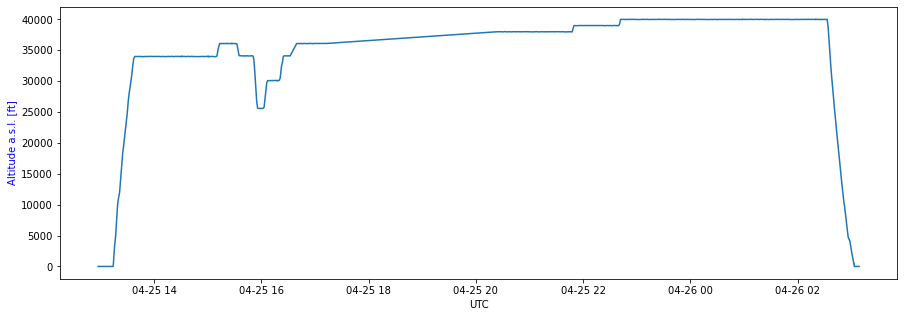

In [6]:
plt.figure(figsize=(15,5))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

In [224]:
#tele

# Combine AIRDOS and telemetry data

Text(0.5, 1.0, '/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG')

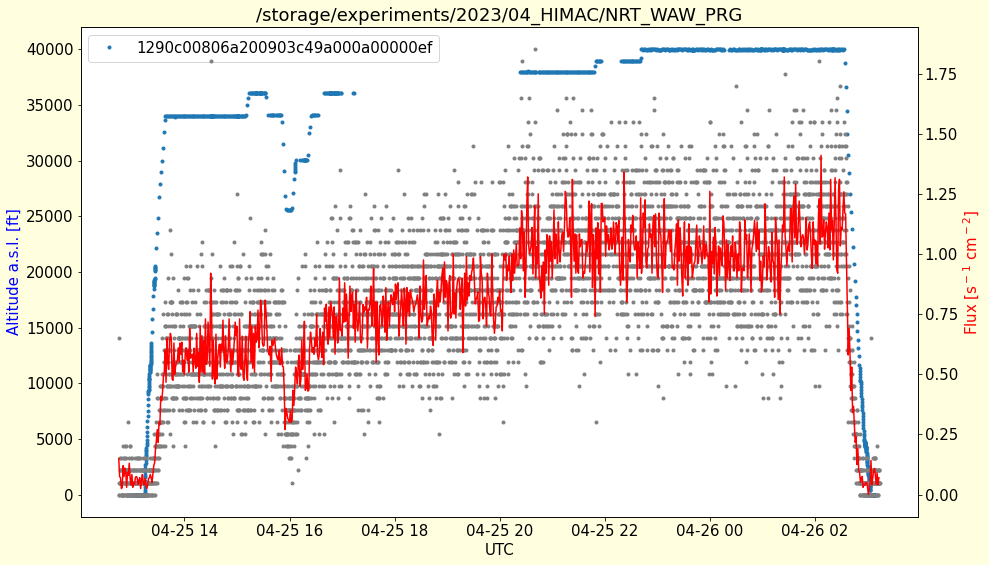

In [7]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'], label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), marker='.', linestyle='')
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rc['sum'].plot(marker='.', linestyle='', color='gray')
#(rc.iloc[:,FIRST_CHANNEL]/10/2).plot(color='sandybrown')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)

#plt.ylim([0,1.6]) 


In [120]:
rc

0          1         2      3  \
time                                                         
NaT                       $DOS  LABDOS01A       NaN    514   
2023-04-22 13:15:11.340  $HIST          0     11.34  21355   
2023-04-22 13:15:22.260  $HIST          1     22.26  21334   
NaT                       $DOS  LABDOS01A       NaN    514   
2023-04-22 13:15:11.330  $HIST          0     11.33  21443   
...                        ...        ...       ...    ...   
2023-04-23 02:29:55.610  $HIST       4376  47695.61  21299   
2023-04-23 02:30:06.430  $HIST       4377  47706.43  21402   
2023-04-23 02:30:17.240  $HIST       4378  47717.24  21371   
2023-04-23 02:30:28.600  $HIST       4379  47728.60  21342   
2023-04-23 02:30:38.900  $HIST       4380  47738.90  21364   

                                                                4        5  \
time                                                                         
NaT                      71cdf196883fa3ab648ae47327ef2137eb69420f  CIBuild   
2023-04-22 13:15:11.340                                         2      375   
2023-04-22 13:15:22.260                                         5      392   
NaT                      71cdf196883fa3ab648ae47327ef2137eb69420f  CIBuild   
2023-04-22 13:15:11.330                                         1      304   
...                                                           ...      ...   
2023-04-23 02:29:55.610                                         1      221   
2023-04-23 02:30:06.430                                         0      223   
2023-04-23 02:30:17.240                                         2      188   
2023-04-23 02:30:28.600                                         1      215   
2023-04-23 02:30:38.900                                         0      222   

                                                        6       7     8    9  \
time                                                                           
NaT                      1290c00806a200903c49a000a00000ef     NaN   NaN  NaN   
2023-04-22 13:15:11.340                             17877  6467.0   7.0  0.0   
2023-04-22 13:15:22.260                             17828  6510.0  14.0  2.0   
NaT                      1290c00806a200903c49a000a00000ef     NaN   NaN  NaN   
2023-04-22 13:15:11.330                             18255  6077.0   3.0  0.0   
...                                                   ...     ...   ...  ...   
2023-04-23 02:29:55.610                             17668  6888.0   6.0  0.0   
2023-04-23 02:30:06.430                             17778  6678.0   2.0  0.0   
2023-04-23 02:30:17.240                             17649  6866.0   7.0  2.0   
2023-04-23 02:30:28.600                             17764  6755.0   6.0  0.0   
2023-04-23 02:30:38.900                             17759  6736.0   2.0  0.0   

                         ...  500  501  502  503  504  runtime   seconds  \
time                     ...                                               
NaT                      ...  NaN  NaN  NaN  NaN  NaN      NaN      0.00   
2023-04-22 13:15:11.340  ...  0.0  0.0  0.0  0.0  0.0   -11.34     11.34   
2023-04-22 13:15:22.260  ...  0.0  0.0  0.0  0.0  0.0   -10.92     22.26   
NaT                      ...  NaN  NaN  NaN  NaN  NaN    22.26      0.00   
2023-04-22 13:15:11.330  ...  0.0  0.0  0.0  0.0  0.0   -11.33     11.33   
...                      ...  ...  ...  ...  ...  ...      ...       ...   
2023-04-23 02:29:55.610  ...  0.0  0.0  0.0  0.0  0.0   -10.82  47695.61   
2023-04-23 02:30:06.430  ...  0.0  0.0  0.0  0.0  0.0   -10.82  47706.43   
2023-04-23 02:30:17.240  ...  0.0  0.0  0.0  0.0  0.0   -10.81  47717.24   
2023-04-23 02:30:28.600  ...  0.0  0.0  0.0  0.0  0.0   -11.36  47728.60   
2023-04-23 02:30:38.900  ...  0.0  0.0  0.0  0.0  0.0   -10.30  47738.90   

                                      run                    time   sum  
time                                                                     
NaT                      2023

0.034 0.016


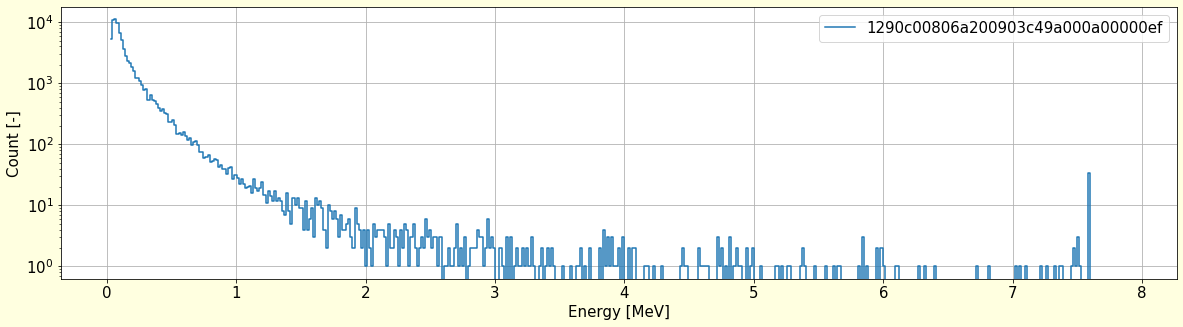

In [229]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/tmp/ipykernel_5202/4065584599.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-25 14:25':'2023-04-25 14:35'].iloc[:,FIRST_CHANNEL:500].sum()
/tmp/ipykernel_5202/4065584599.py:35: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-25 14:50':'2023-04-25 15:00'].iloc[:,FIRST_CHANNEL:500].sum()


0.034 0.016
0.034 0.016


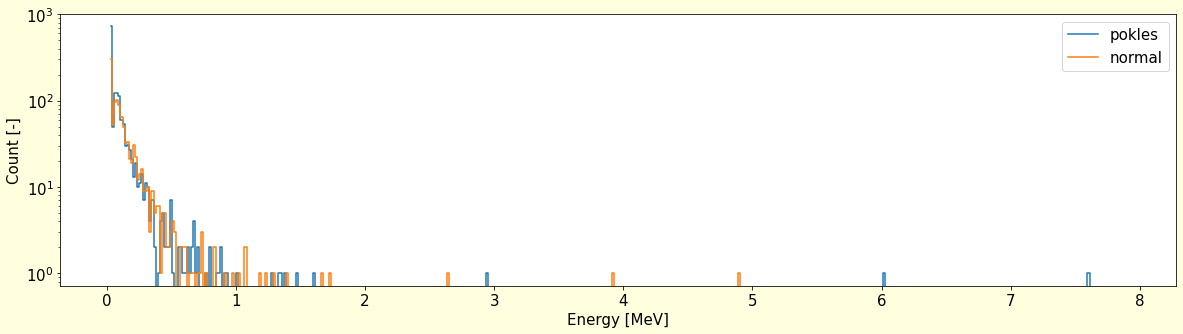

In [261]:
ener = rc.loc['2023-04-25 14:25':'2023-04-25 14:35'].iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='pokles', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

ener = rc.loc['2023-04-25 14:50':'2023-04-25 15:00'].iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.plot(e3['x'], e3['1'] , label='normal', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None
None

In [12]:
rc.iloc[:,8:500]
#e3.loc[8:499]
e3

1    i      x
8    1838.0    8  0.034
9    2198.0    9  0.050
10   2949.0   10  0.066
11   3155.0   11  0.082
12   2125.0   12  0.098
..      ...  ...    ...
495     0.0  495  7.826
496     0.0  496  7.842
497     0.0  497  7.858
498     0.0  498  7.874
499     0.0  499  7.890

[492 rows x 3 columns]

TypeError: cannot do slice indexing on Index with these indexers [8] of type int

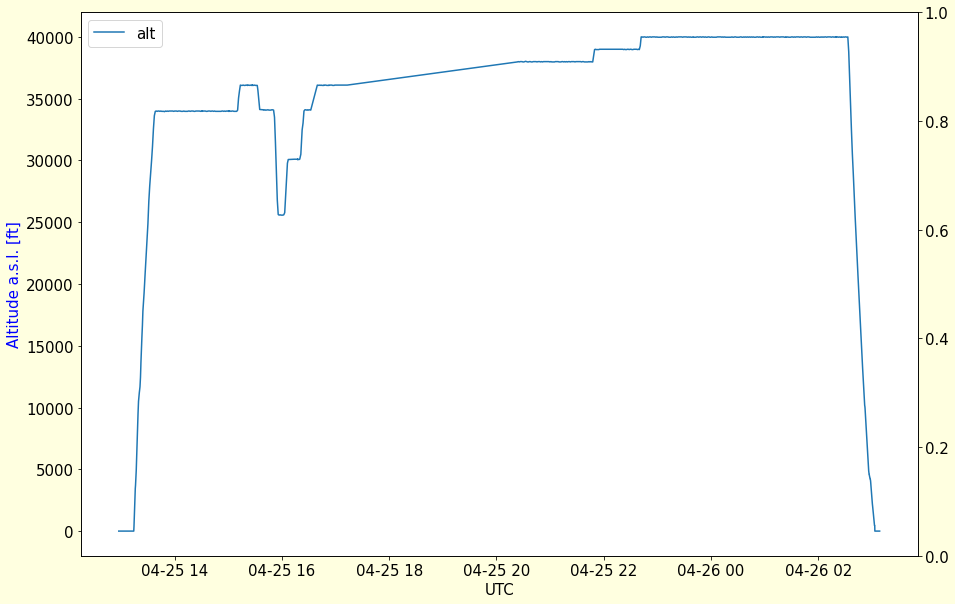

In [256]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'], label='alt')
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

#rc = rc.iloc[3286:]
plt.legend(loc=2)

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)
rc['ener'] = (np.asarray(rc.iloc[:,8:500]) * np.asarray(e3.loc[8:499,'x'])).sum(axis=1)    
rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1398e-3)/6.88) * 3600 #* 2.45 * 1.048#* 1.1 #1.094#2.71 # in uGy/h


rc['dsi'].plot(marker='.', linestyle='', color='gray')
rc['roll'] = rc['dsi'].rolling(150).mean()
rc['roll'].plot(color='black')
rcc = rc.resample('10T').mean()
rcc['dsi'].plot(color='red')
plt.ylabel('Doserate [µGy/h]', color='red')
plt.title(fto)
#plt.yscale('log')

plt.ylim([0,3]) 
plt.legend(loc=1)


/tmp/ipykernel_7839/1754771637.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2


Text(0, 0.5, 'Flux [s$^-$$^1$ cm$^-$$^2$]')

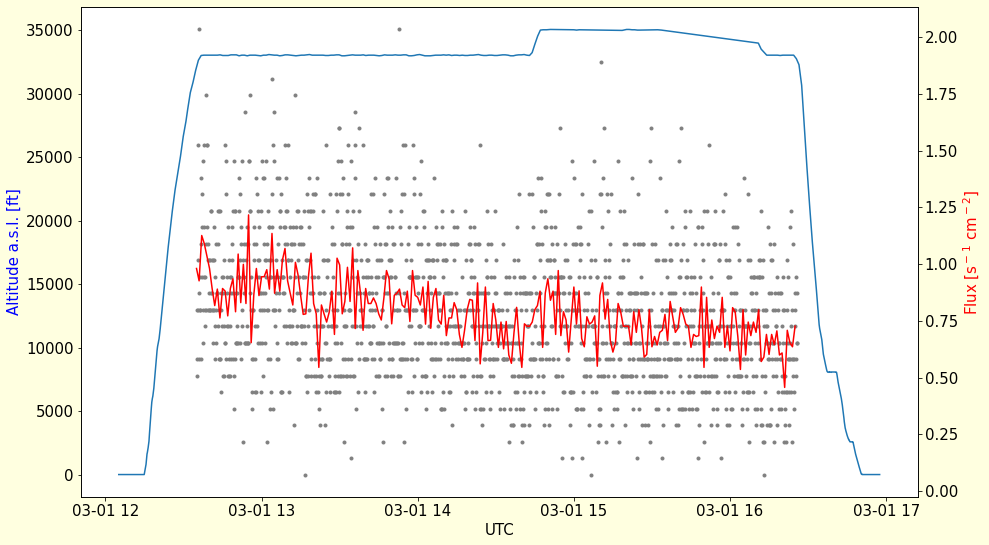

In [32]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

rcc = rc.loc['2023-03-1 12:35':'2023-03-1 16:25']

plt.twinx()

rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rcc['sum'].plot(marker='.', linestyle='', color='gray')
rccc = rcc.resample('1T').mean()
rccc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')

#plt.ylim([0,30]) 


0.034 0.016


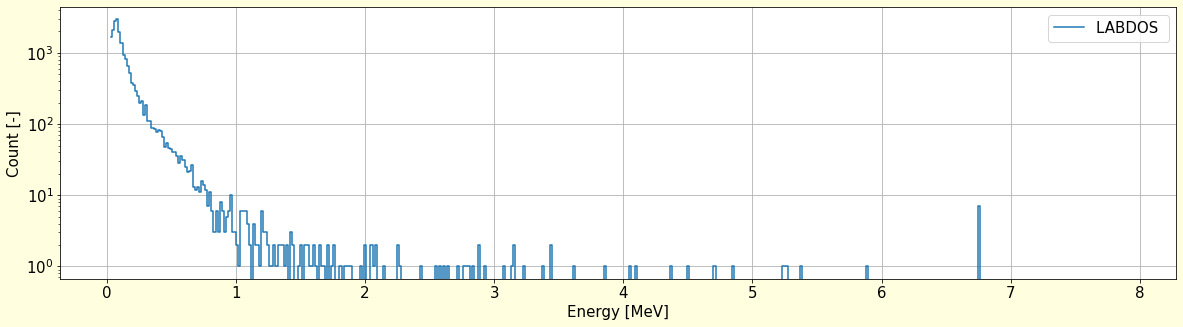

In [13]:
ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

0.034 0.016


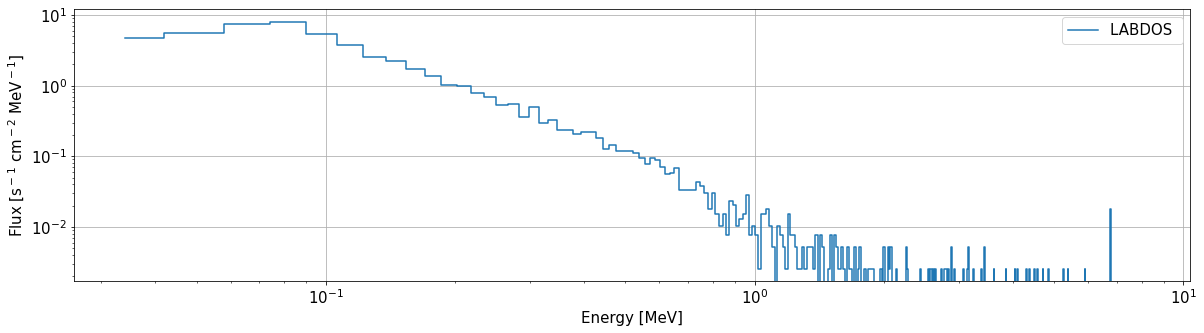

In [36]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0] 
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / 2 / measurement_duration / coef3[1], label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$ MeV$^-$$^1$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [33]:
print('The first measurement', rcc.iloc[0,1])
print('The last measurement', rcc.iloc[-1,1])
measurement_duration = (int(rcc.iloc[-1,1]) - int(rcc.iloc[0,1])) * 6.88
flight_duration = rcc.iloc[-1,2] - rcc.iloc[0,2]
print('Begin', rcc.iloc[0,2], 's')
print('End', rcc.iloc[-1,2], 's')
print('Flight duration', round(flight_duration,2), 's')
print('Measurement duration', measurement_duration, 's')
deathtime_ratio = flight_duration / measurement_duration
print('Deathtime ratio', round(deathtime_ratio,2))

e3['total'] = e3['1']*e3['x']
depener = e3['total'].sum()*deathtime_ratio
print('Deposited Energy including deathtime', round(depener,2), 'MeV')
dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h

print('Dose in silicon', round(dose,2), 'µGy')


The first measurement 346
The last measurement 2125
Begin 2700.27 s
End 16554.1 s
Flight duration 13853.83 s
Measurement duration 12239.52 s
Deathtime ratio 1.13
Deposited Energy including deathtime 3416.34 MeV
Dose in silicon 3.91 µGy


## Route map

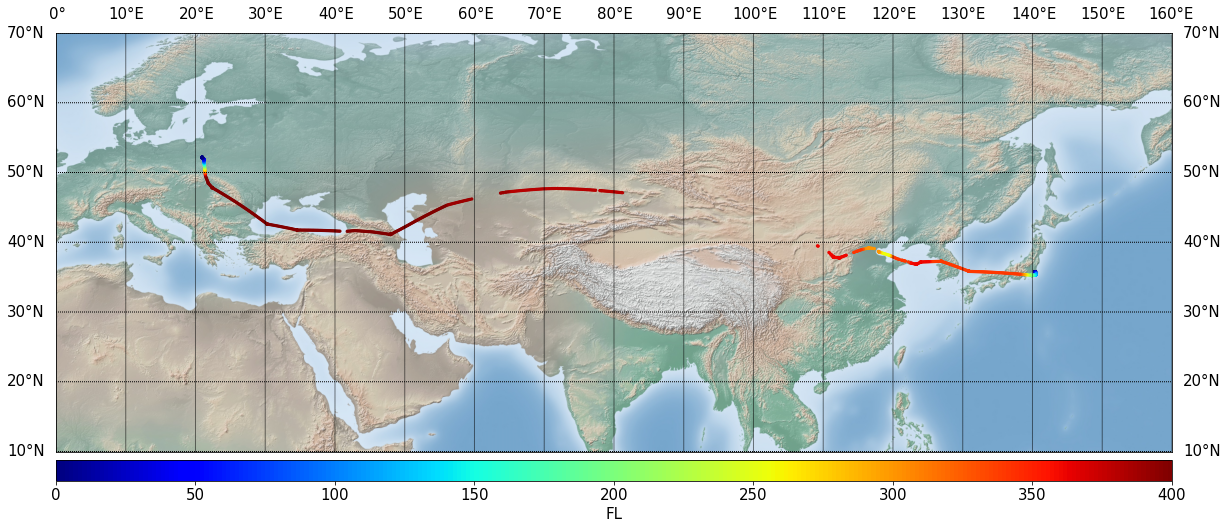

In [230]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
m = Basemap(projection='cyl',lon_0=0, llcrnrlon=0,llcrnrlat=10,urcrnrlon=160,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


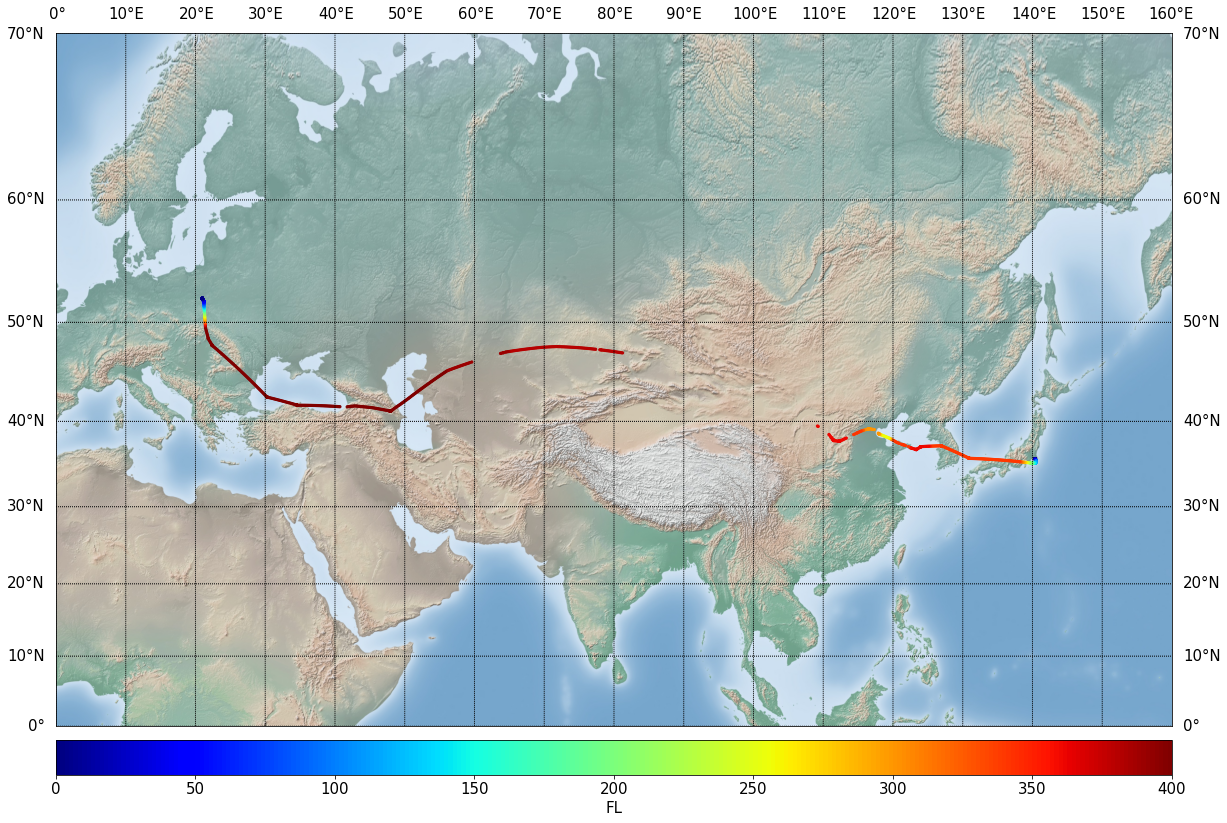

In [26]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
#m = Basemap(projection='tmerc',lon_0=0,lat_0=0, llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m = Basemap(projection='merc',lon_0=0,lat_0=0, llcrnrlon=0,llcrnrlat=0,urcrnrlon=160,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


In [38]:
cari_photons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_photons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_photons.reset_index(drop=True, inplace=True)
cari_photons['time'] = pd.to_datetime(dict(year=cari_photons[6], month=cari_photons[7], day=cari_photons[8], hour=cari_photons[9], minute=cari_photons[10]))
cari_photons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [39]:
cari_electrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_electrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_electrons.reset_index(drop=True, inplace=True)
cari_electrons['time'] = pd.to_datetime(dict(year=cari_electrons[6], month=cari_electrons[7], day=cari_electrons[8], hour=cari_electrons[9], minute=cari_electrons[10]))
cari_electrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [46]:
cari_protons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_protons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_protons.reset_index(drop=True, inplace=True)
cari_protons['time'] = pd.to_datetime(dict(year=cari_protons[6], month=cari_protons[7], day=cari_protons[8], hour=cari_protons[9], minute=cari_protons[10]))
cari_protons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [58]:
cari_alphas = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_alphas.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_alphas.reset_index(drop=True, inplace=True)
cari_alphas['time'] = pd.to_datetime(dict(year=cari_alphas[6], month=cari_alphas[7], day=cari_alphas[8], hour=cari_alphas[9], minute=cari_alphas[10]))
cari_alphas.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [54]:
cari_neg_muons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_neg_muons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_neg_muons.reset_index(drop=True, inplace=True)
cari_neg_muons['time'] = pd.to_datetime(dict(year=cari_neg_muons[6], month=cari_neg_muons[7], day=cari_neg_muons[8], hour=cari_neg_muons[9], minute=cari_neg_muons[10]))
cari_neg_muons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [118]:
cari_positrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_positrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_positrons.reset_index(drop=True, inplace=True)
cari_positrons['time'] = pd.to_datetime(dict(year=cari_positrons[6], month=cari_positrons[7], day=cari_positrons[8], hour=cari_positrons[9], minute=cari_positrons[10]))
cari_positrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [49]:
cari_total = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_Total.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_total.reset_index(drop=True, inplace=True)
cari_total['time'] = pd.to_datetime(dict(year=cari_total[6], month=cari_total[7], day=cari_total[8], hour=cari_total[9], minute=cari_total[10]))
cari_total.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


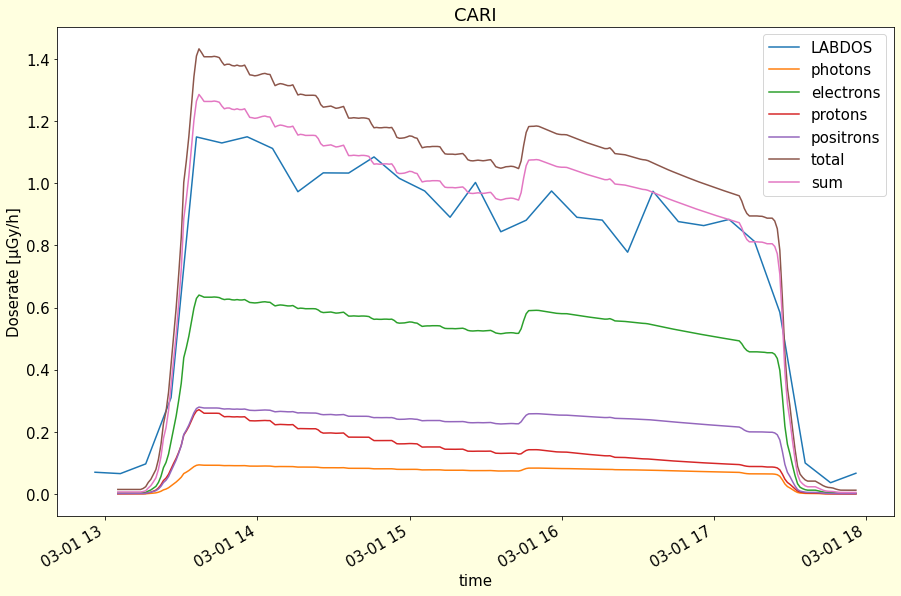

In [192]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc.index + timedelta(hours=1.1),rcc['dsi'], label='LABDOS')
#plt.plot(rc.index + timedelta(hours=1),rc['roll'], label='LABDOS')

cari_photons[4].plot(label='photons')
cari_electrons[4].plot(label='electrons')
cari_protons[4].plot(label='protons')
#cari_alphas[4].plot(label='alphas')
cari_positrons[4].plot(label='positrons')
#cari_neg_muons[4].plot(label='neg_muons')
cari_total[4].plot(label='total')
(cari_photons[4]+cari_electrons[4]+cari_protons[4]+cari_positrons[4]).plot(label='sum')
plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

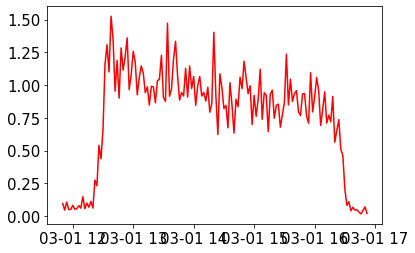

In [145]:
plt.plot(rcc.index,rcc['dsi'], color='red')


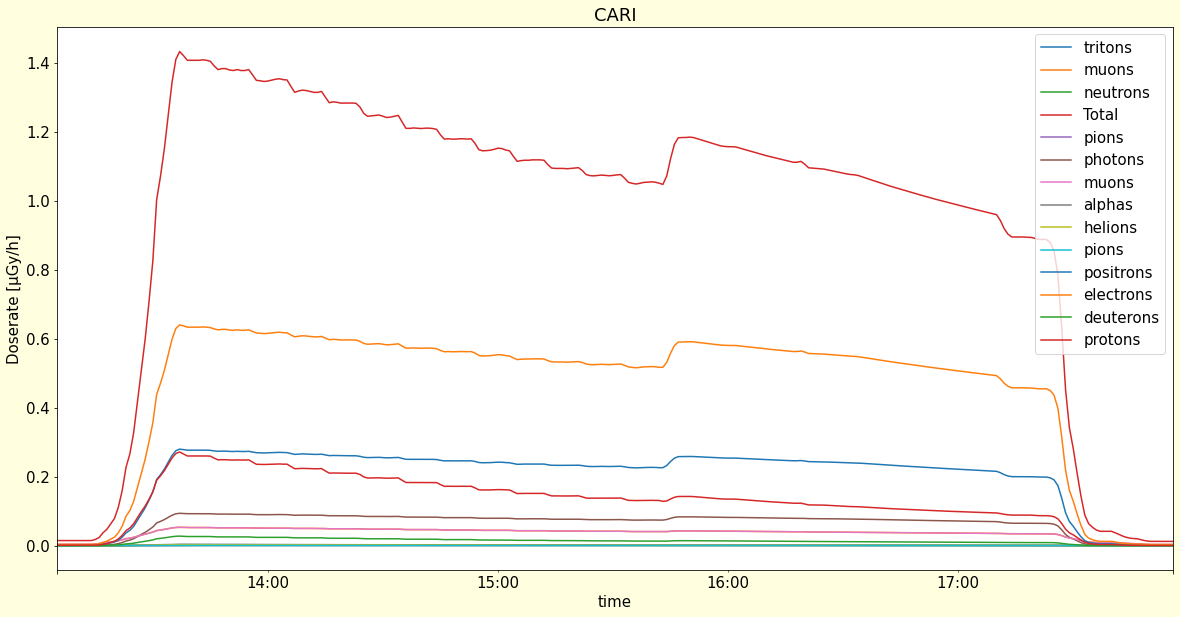

In [151]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


dto = '/storage/experiments/2023/0301_SA/0301_W62987/CARI/'


for fto in glob.iglob(dto + 'W62987_2f5ddba8_D*'): # generator, search immediate subdirectories 
    particles = fto.split('/')[-1].split('.')[-2].split('_')[-1]
    if (len(particles)>2):
        cari = pd.read_table(fto, delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')    
        #cari.reset_index(drop=True, inplace=True)
        cari['time'] = pd.to_datetime(dict(year=cari[6], month=cari[7], day=cari[8], hour=cari[9], minute=cari[10]))
        cari.set_index('time', drop=False, inplace=True)
        cari[4].plot(label=particles)
    

plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

In [113]:
fto.split('/')[-1].split('.')[-2].split('_')[-1]

'tritons'

# Load and plot mutiple devices

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT


Text(0.5, 0, 'UTC')

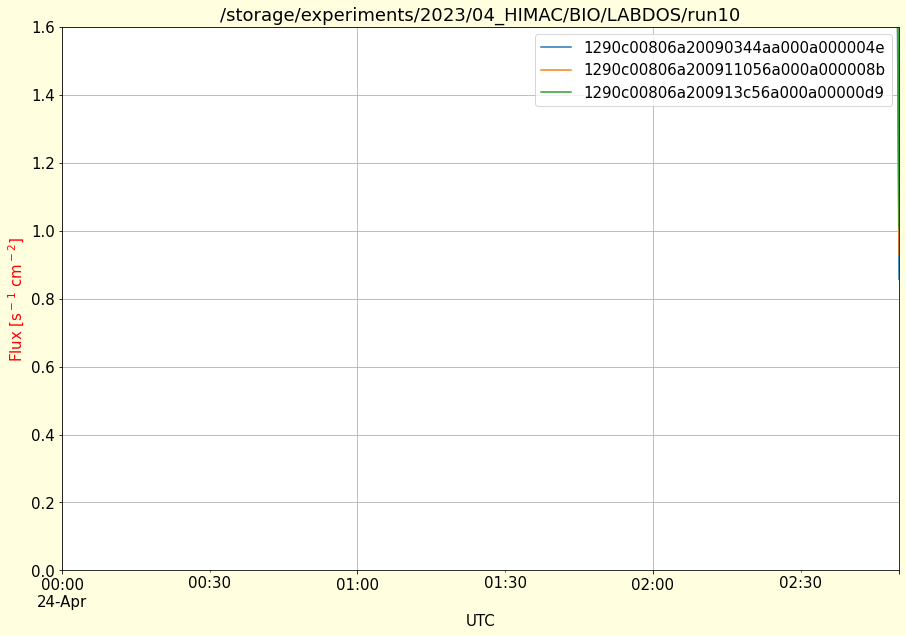

In [49]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
#SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    #rc['sum'].plot(marker='.', linestyle='', color='gray')
    rcc = rc.resample('10T').mean()
    rcc['sum'].plot(label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))


plt.ylim([0,1.6]) 
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_D9/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_8B/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_4E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/NRT_PRG/LABDOS_B8/0.TXT
0.034 0.016


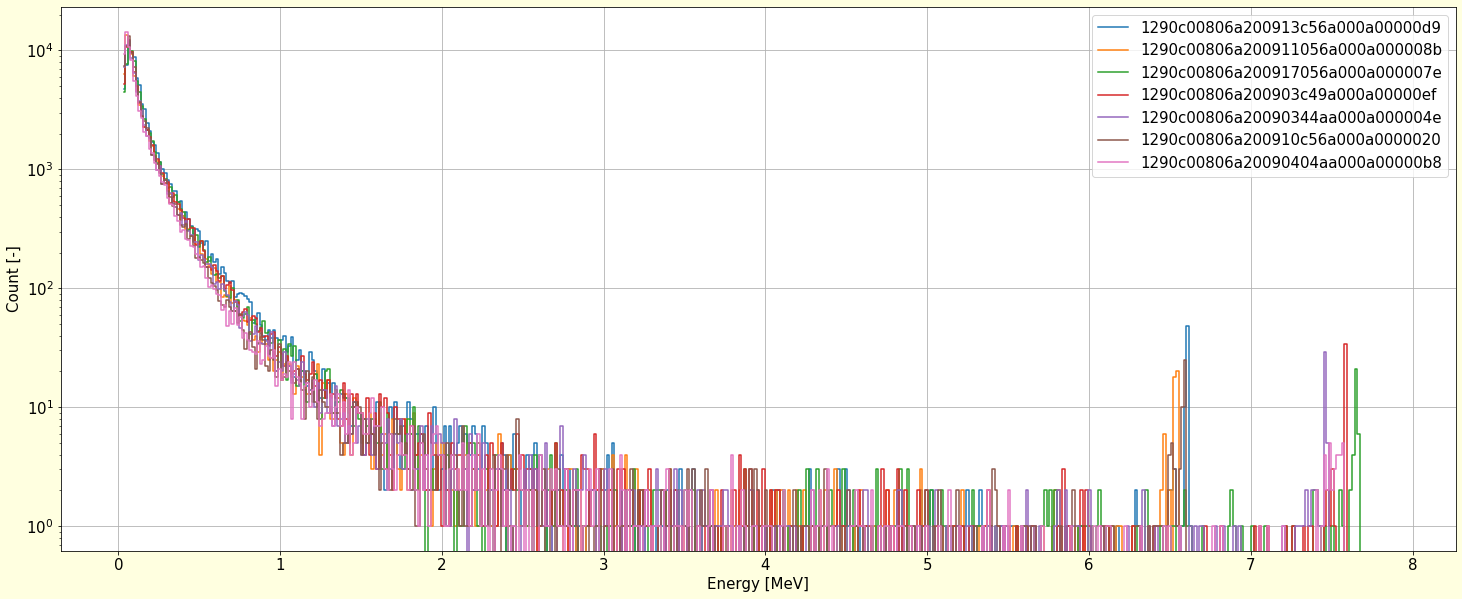

In [237]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_D9/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_8B/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_4E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/WAW_NRT/LABDOS_20/0.TXT
0.034 0.016


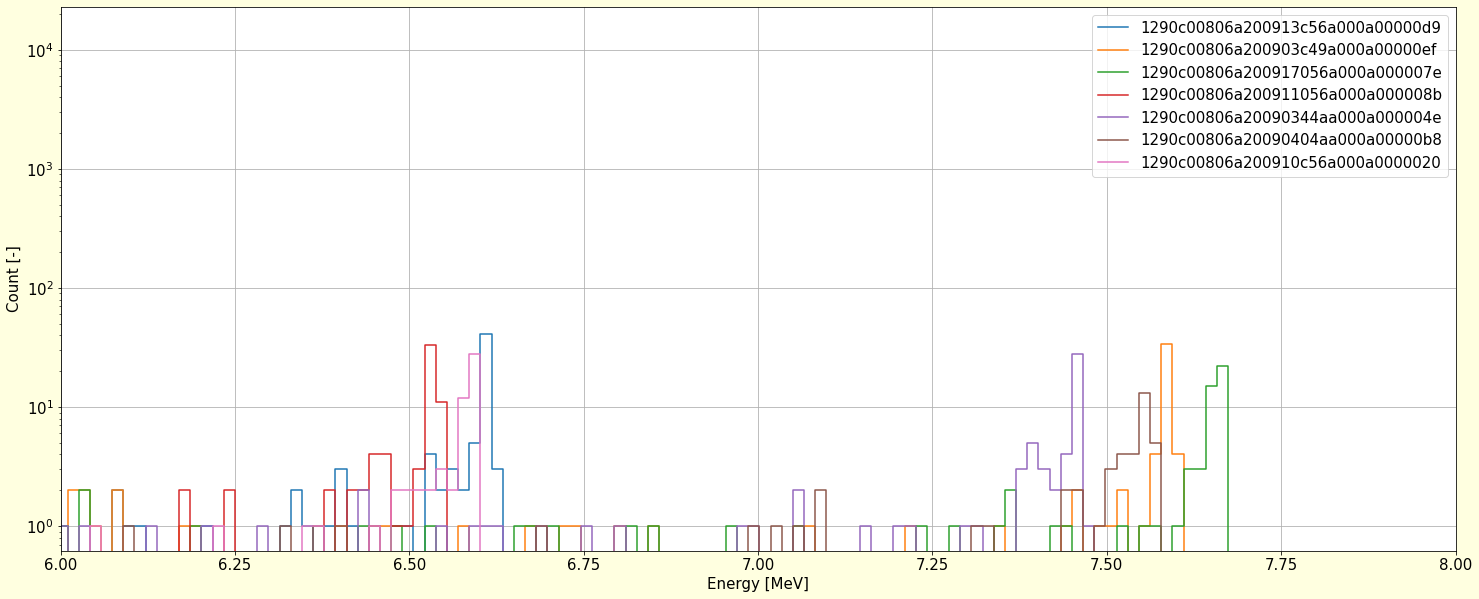

In [152]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
plt.xlim(6,8)
#plt.vlines(0.511,1,1e4, color='red')

None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 20.0)

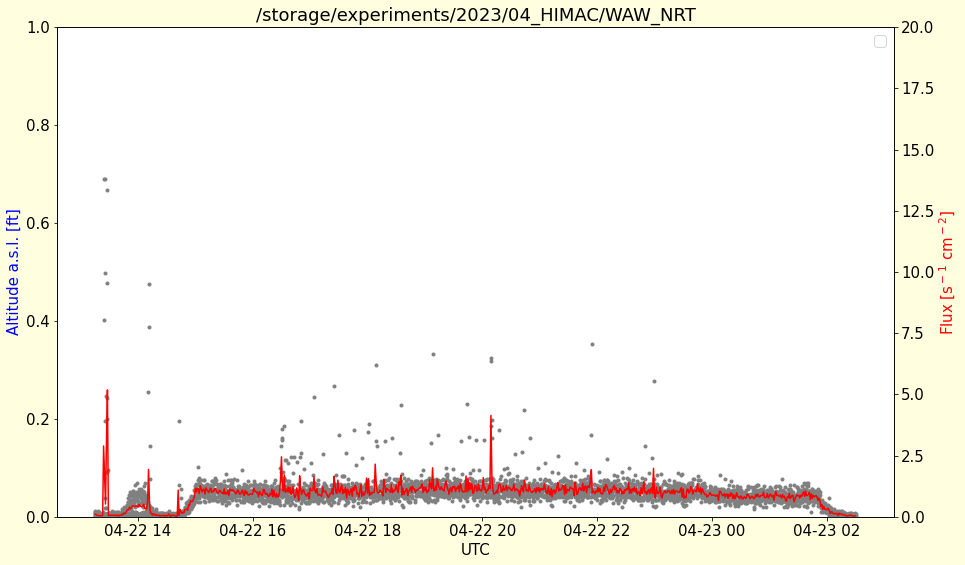

In [135]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


#plt.plot(tele['Altitude'], label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rc['sum'].plot(marker='.', linestyle='', color='gray')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)

plt.ylim([0,20]) 


In [147]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 400)

rc.loc['2023-04-22 20:40':'2023-04-22 20:50'].iloc[:,8:40]


/tmp/ipykernel_5202/556692503.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc.loc['2023-04-22 20:40':'2023-04-22 20:50'].iloc[:,8:40]


8    9    10    11    12   13   14   15   16   17  \
time                                                                            
2023-04-22 20:40:03.620   8.0  2.0   4.0   5.0   1.0  2.0  1.0  2.0  1.0  2.0   
2023-04-22 20:40:14.420   9.0  0.0   2.0   3.0   2.0  1.0  3.0  0.0  1.0  0.0   
2023-04-22 20:40:25.240   5.0  1.0  10.0   1.0   5.0  3.0  3.0  0.0  2.0  0.0   
2023-04-22 20:40:36.500   3.0  0.0   3.0   9.0   4.0  3.0  3.0  2.0  1.0  0.0   
2023-04-22 20:40:47.160   6.0  1.0   2.0   0.0   3.0  3.0  1.0  2.0  1.0  0.0   
2023-04-22 20:40:57.980   5.0  0.0   1.0   1.0   1.0  2.0  0.0  0.0  0.0  0.0   
2023-04-22 20:41:09.800  10.0  2.0   2.0   4.0   3.0  0.0  3.0  0.0  1.0  0.0   
2023-04-22 20:41:19.890   6.0  1.0   0.0   4.0   2.0  2.0  0.0  1.0  1.0  0.0   
2023-04-22 20:41:31.000   5.0  0.0   3.0   2.0   2.0  1.0  2.0  0.0  1.0  0.0   
2023-04-22 20:41:41.810   3.0  1.0   3.0   2.0   2.0  2.0  1.0  3.0  1.0  0.0   
2023-04-22 20:41:52.620  26.0  4.0   5.0  20.0  10.0  3.0  1.0  3.0  2.0  0.0   
2023-04-22 20:42:03.430   3.0  2.0   3.0   3.0   2.0  2.0  1.0  0.0  0.0  0.0   
2023-04-22 20:42:14.240  12.0  1.0   5.0   4.0   5.0  2.0  4.0  1.0  1.0  0.0   
2023-04-22 20:42:25.700   4.0  1.0   1.0   2.0   3.0  3.0  2.0  2.0  1.0  2.0   
2023-04-22 20:42:35.880   3.0  2.0   3.0   2.0   0.0  4.0  4.0  2.0  1.0  1.0   
2023-04-22 20:42:46.690   5.0  2.0   2.0   4.0   4.0  0.0  1.0  1.0  2.0  1.0   
2023-04-22 20:42:57.500   7.0  2.0   0.0   8.0   1.0  0.0  4.0  0.0  0.0  0.0   
2023-04-22 20:43:08.310  11.0  0.0   3.0   1.0   1.0  0.0  1.0  3.0  0.0  0.0   
2023-04-22 20:43:19.120   6.0  2.0   4.0   3.0   2.0  4.0  1.0  0.0  2.0  0.0   
2023-04-22 20:43:29.930  13.0  3.0   4.0   5.0   2.0  2.0  0.0  3.0  0.0  0.0   
2023-04-22 20:43:40.740   4.0  1.0   5.0   7.0   3.0  0.0  1.0  1.0  0.0  0.0   
2023-04-22 20:43:51.850   8.0  1.0   1.0   3.0   4.0  1.0  2.0  0.0  1.0  0.0   
2023-04-22 20:44:02.660  12.0  8.0  13.0  30.0  22.0  5.0  3.0  2.0  0.0  1.0   
2023-04-22 20:44:13.770   3.0  2.0   2.0   3.0   0.0  0.0  1.0  1.0  1.0  1.0   
2023-04-22 20:44:24.580   5.0  1.0   0.0   4.0   0.0  0.0  1.0  1.0  0.0  1.0   
2023-04-22 20:44:35.390   4.0  0.0   4.0   3.0   1.0  1.0  1.0  2.0  1.0  0.0   
2023-04-22 20:44:46.200  16.0  1.0   2.0   6.0   4.0  1.0  0.0  1.0  0.0  0.0   
2023-04-22 20:44:57.100   9.0  0.0   6.0   7.0   2.0  0.0  2.0  1.0  1.0  0.0   
2023-04-22 20:45:08.120   9.0  1.0   9.0   5.0   3.0  2.0  1.0  0.0  0.0  0.0   
2023-04-22 20:45:18.940   6.0  1.0   4.0   5.0   2.0  0.0  3.0  0.0  0.0  1.0   
2023-04-22 20:45:29.750   7.0  1.0   4.0   4.0   4.0  1.0  5.0  4.0  2.0  0.0   
2023-04-22 20:45:40.560   9.0  0.0   1.0   4.0   2.0  0.0  2.0  0.0  1.0  0.0   
2023-04-22 20:45:51.670  13.0  2.0   2.0   5.0   4.0  2.0  0.0  1.0  0.0  1.0   
2023-04-22 20:46:02.480   6.0  3.0   1.0   5.0   3.0  1.0  1.0  0.0  0.0  2.0   
2023-04-22 20:46:13.290   3.0  0.0   2.0   4.0   5.0  2.0  0.0  0.0  1.0  1.0   
2023-04-22 20:46:24.100  12.0  1.0   2.0   3.0   5.0  2.0  1.0  0.0  0.0  1.0   
2023-04-22 20:46:34.900   6.0  1.0   6.0   2.0   2.0  2.0  0.0  0.0  2.0  0.0   
2023-04-22 20:46:46.100  12.0  2.0   3.0   4.0   1.0  2.0  0.0  3.0  0.0  0.0   
2023-04-22 20:46:56.820  11.0  0.0   3.0   3.0   3.0  2.0  0.0  0.0  1.0  0.0   
2023-04-22 20:47:07.630   6.0  0.0   1.0   3.0   5.0  0.0  2.0  0.0  1.0  2.0   
2023-04-22 20:47:18.430   9.0  1.0   2.0   5.0   2.0  2.0  2.0  1.0  0.0  1.0   
2023-04-22 20:47:29.240  10.0  0.0   6.0   2.0   5.0  1.0  5.0  0.0  0.0  0.0   
2023-04-22 20:47:40.500   6.0  0.0   2.0   1.0   5.0  0.0  1.0  0.0  0.0  0.0   
2023-04-22 20:47:50.860  10.0  1.0   3.0   3.0   3.0  2.0  2.0  1.0  0.0  1.0   
2023-04-22 20:48:01.660   5.0  2.0   0.0   4.0   2.0  0.0  1.0  2.0  1.0  0.0   
2023-04-22 20:48:12.480  12.0  1.0   3.0   5.0   2.0  1.0  0.0  0.0  2.0  3.0   
2023-04-22 20:48:23.290   9.0  3.0   3.0   0.0   1.0  2.0  2.0  0.0  0.0  1.0   
2023-04-22 20:48:34.100  10.0  0.0   1.0   2.0   1.0  2.0  

# HIMAC preview

In [46]:
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17'
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20'
fto = '/storage/experiments/2023/04_labdos_BaCs/2nd'

/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT


Text(0.5, 0, 'UTC')

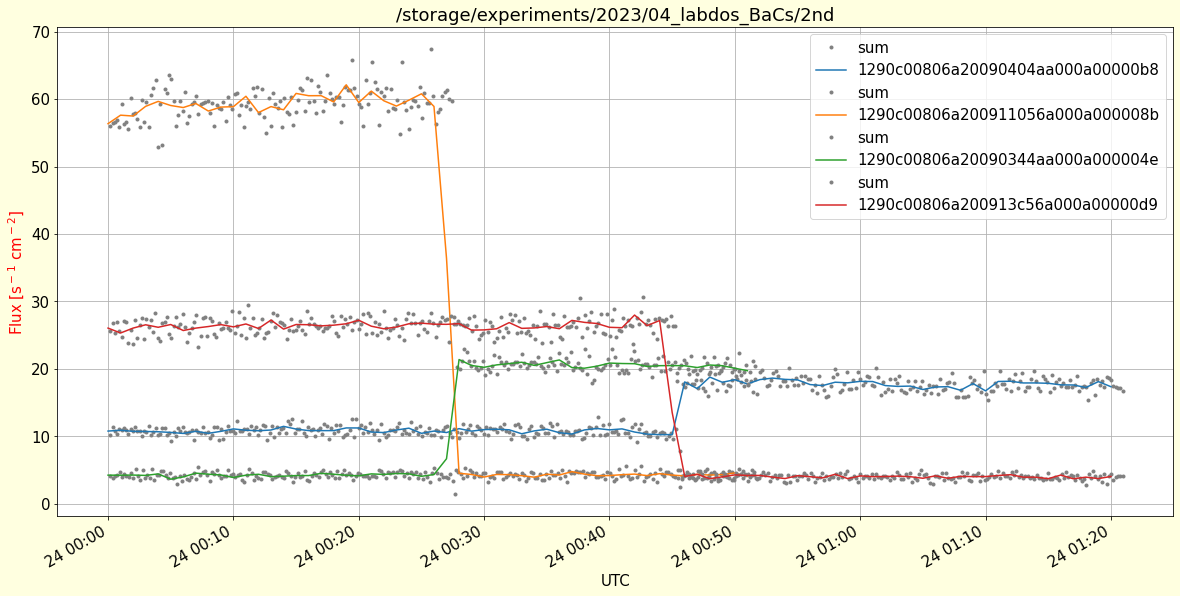

In [22]:
#ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0']

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    
    rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    rc['sum'].plot(marker='.', linestyle='', color='gray')
    rcc = rc.resample('1T').mean()
    rcc['sum'].plot(label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))

    #plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


In [12]:
df.loc[df[0]=='$DOS'].index[0]

0

/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT
0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT
0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT


/tmp/ipykernel_1078/1091577354.py:48: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()
/tmp/ipykernel_1078/1091577354.py:48: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()
/tmp/ipykernel_1078/1091577354.py:48: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()


0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT
0.034 0.016


/tmp/ipykernel_1078/1091577354.py:48: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()


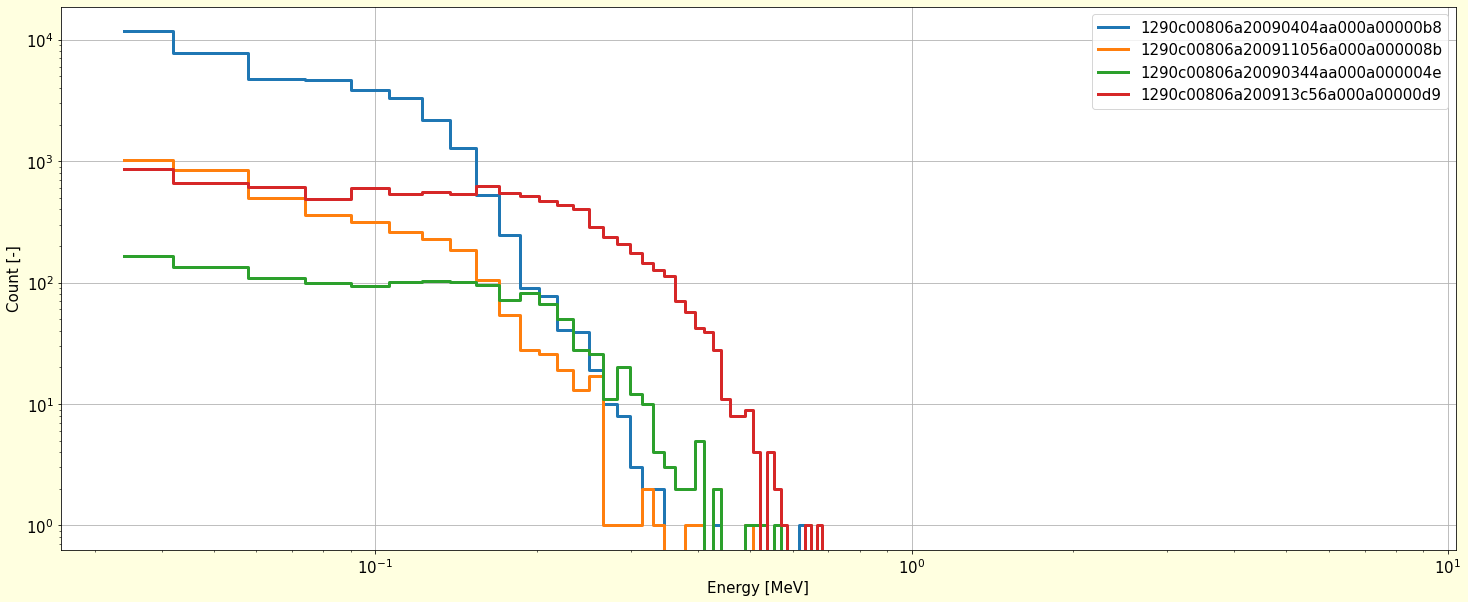

In [25]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 
#SWITCH_ON_TIMES = ['2023-04-24 02:12']
#SWITCH_ON_TIMES = ['2023-04-24 01:07']
#SWITCH_ON_TIMES = ['2023-04-24 00:05']
SWITCH_ON_TIMES = ['2023-04-24 00:00']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()
    
    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)

    
    FIRST_CHANNEL = 9

    #ener = rc.iloc[:,FIRST_CHANNEL:500].sum()
    #ener = rc.loc['2023-04-24 00:10:00':'2023-04-24 00:25:00'].iloc[:,FIRST_CHANNEL:500].sum()
    #ener = rc.loc['2023-04-24 00:29:00':'2023-04-24 00:43:00'].iloc[:,FIRST_CHANNEL:500].sum()
    ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()

    #ener = rc.loc['2023-04-24 00:50:00':'2023-04-24 01:10:00'].iloc[:,FIRST_CHANNEL:500].sum()
    #ener = rc.loc['2023-04-24 00:25:00':'2023-04-24 00:40:00'].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [71]:
rc.loc['2023-04-24 00:00:00':'2023-04-24 00:20:00']


0    1        2      3   4      5      6      7  \
time                                                                           
2023-04-24 00:00:10.960  $HIST    0    10.96  20863   5   9897  15272   45.0   
2023-04-24 00:00:21.760  $HIST    1    21.76  20850  28   9104  15743  332.0   
2023-04-24 00:00:32.560  $HIST    2    32.56  20580  42   8375  16610  432.0   
2023-04-24 00:00:43.360  $HIST    3    43.36  20618  42   9265  15722  409.0   
2023-04-24 00:00:54.160  $HIST    4    54.16  20582  54   9789  15198  421.0   
...                        ...  ...      ...    ...  ..    ...    ...    ...   
2023-04-24 00:19:14.780  $HIST  104  1154.78  20971  57  15113   9634  274.0   
2023-04-24 00:19:25.580  $HIST  105  1165.58  20951  41  14745  10005  303.0   
2023-04-24 00:19:36.680  $HIST  106  1176.68  21029  38  15402   9298  276.0   
2023-04-24 00:19:47.780  $HIST  107  1187.78  20807  50  13864  11006  325.0   
2023-04-24 00:19:58.910  $HIST  108  1198.91  21001  46  15010   9705  292.0   

                            8     9  ...  499  500  501  502  503  504  \
time                                 ...                                 
2023-04-24 00:00:10.960   0.0   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:00:21.760  26.0   8.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:00:32.560  44.0   9.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:00:43.360  27.0  14.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:00:54.160  38.0  17.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...   ...  ...  ...  ...  ...  ...  ...  ...   
2023-04-24 00:19:14.780  24.0  20.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:19:25.580  24.0  12.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:19:36.680  21.0  10.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:19:47.780  28.0  14.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:19:58.910  18.0  13.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

                         runtime  seconds               run  \
time                                                          
2023-04-24 00:00:10.960   -10.96    10.96  2023-04-24 00:00   
2023-04-24 00:00:21.760   -10.80    21.76  2023-04-24 00:00   
2023-04-24 00:00:32.560   -10.80    32.56  2023-04-24 00:00   
2023-04-24 00:00:43.360   -10.80    43.36  2023-04-24 00:00   
2023-04-24 00:00:54.160   -10.80    54.16  2023-04-24 00:00   
...                          ...      ...               ...   
2023-04-24 00:19:14.780   -11.10  1154.78  2023-04-24 00:00   
2023-04-24 00:19:25.580   -10.80  1165.58  2023-04-24 00:00   
2023-04-24 00:19:36.680   -11.10  1176.68  2023-04-24 00:00   
2023-04-24 00:19:47.780   -11.10  1187.78  2023-04-24 00:00   
2023-04-24 00:19:58.910   -11.13  1198.91  2023-04-24 00:00   

                                           time  
time                                             
2023-04-24 00:00:10.960 2023-04-24 00:00:10.960  
2023-04-24 00:00:21.760 2023-04-24 00:00:21.760  
2023-04-24 00:00:32.560 2023-04-24 00:00:32.560  
2023-04-24 00:00:43.360 2023-04-24 00:00:43.360  
2023-04-24 00:00:54.160 2023-04-24 00:00:54.160  
...                                         ...  
2023-04-24 00:19:14.780 2023-04-24 00:19:14.780  
2023-04-24 00:19:25.580 2023-04-24 00:19:25.580  
2023-04-24 00:19:36.680 2023-04-24 00:19:36.680  
2023-04-24 00:19:47.780 2023-04-24 00:19:47.780  
2023-04-24 00:19:58.910 2023-04-24 00:19:58.910  

[109 rows x 509 columns]

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT
0.034 0.016


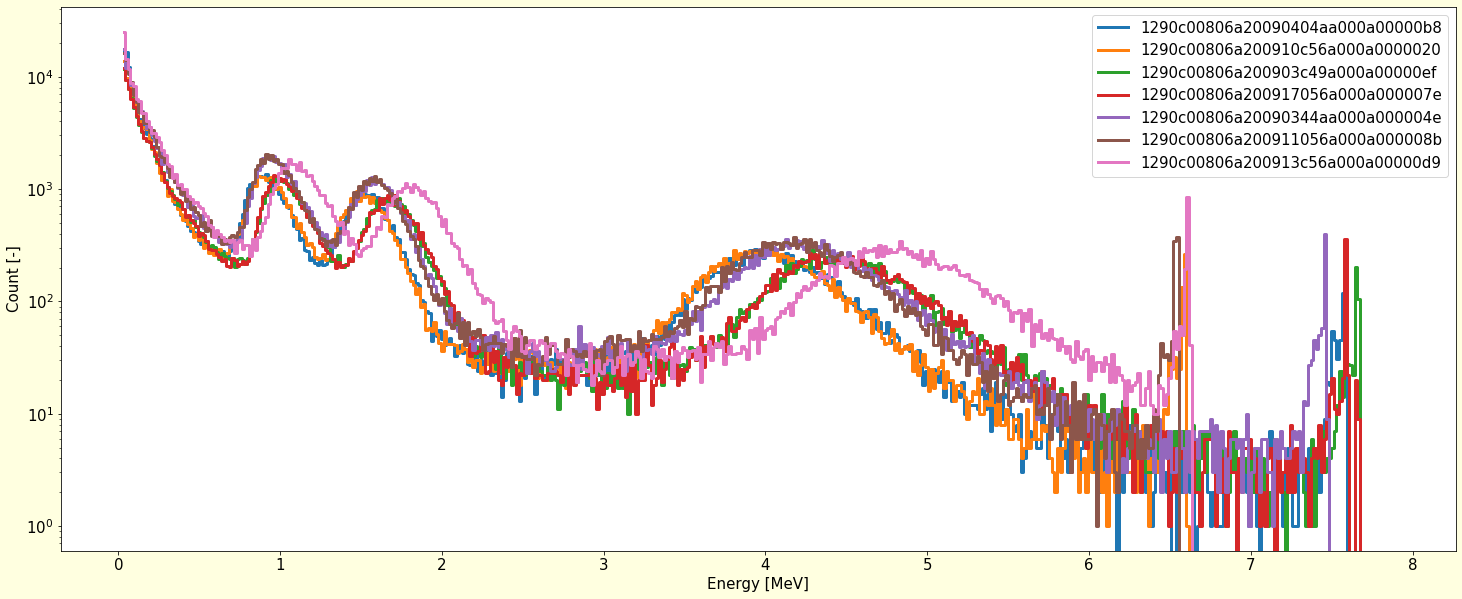

In [33]:
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0']

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2


ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 00:22']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()



#----------------------------------------------------------------------------------------------------------------------
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0']

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 02:12']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()



# spectra

/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT


Text(0.5, 0, 'Measurement No.')

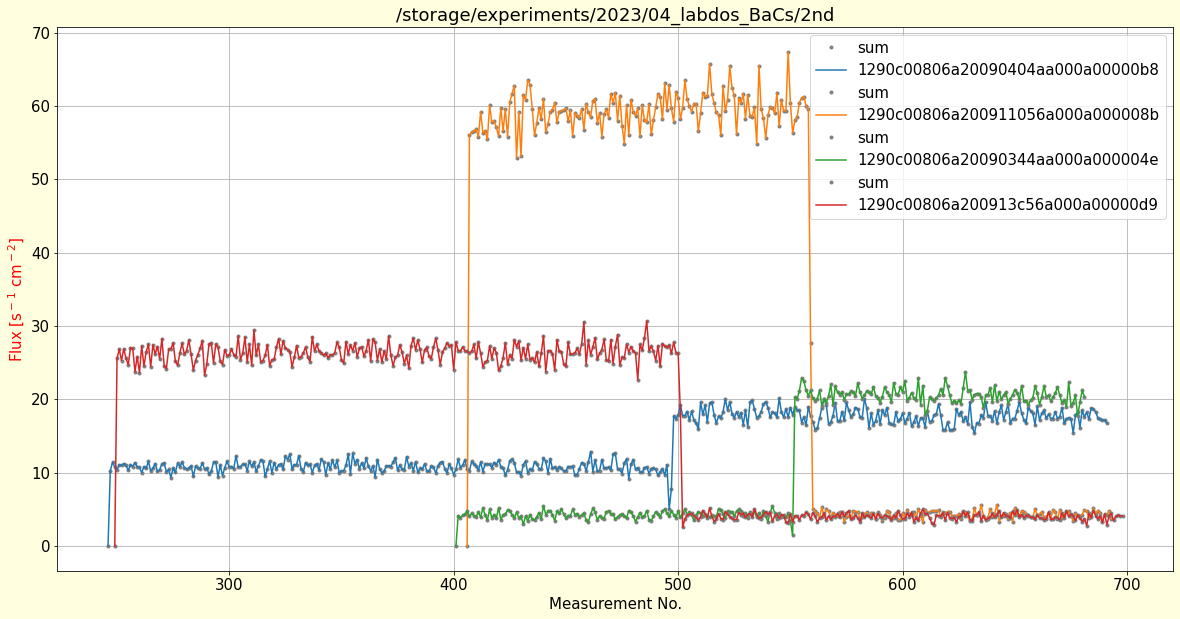

In [50]:
#ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    #df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    
    rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    rc[2] = pd.to_numeric(rc[2])
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    rc['sum'].plot(marker='.', linestyle='', color='gray')
    #rcc = rc.resample('1T').mean()
    rc['sum'].plot(label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))

    #plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('Measurement No.')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


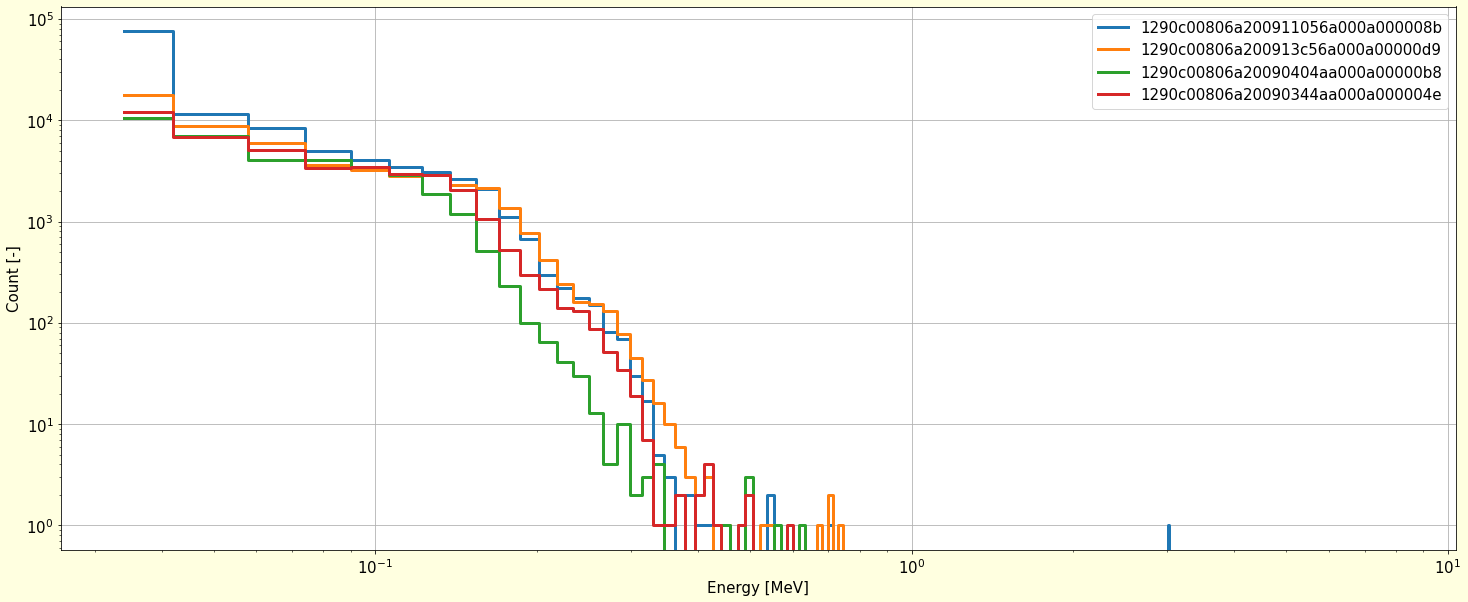

In [56]:
def spectrum(file, start):
    end = start+100
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)

    FIRST_CHANNEL = 9

    ener = df.iloc[start:end].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()

spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT',420) # 420, 590
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT',300) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT',510) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT',570) # 410, 570

plt.legend()



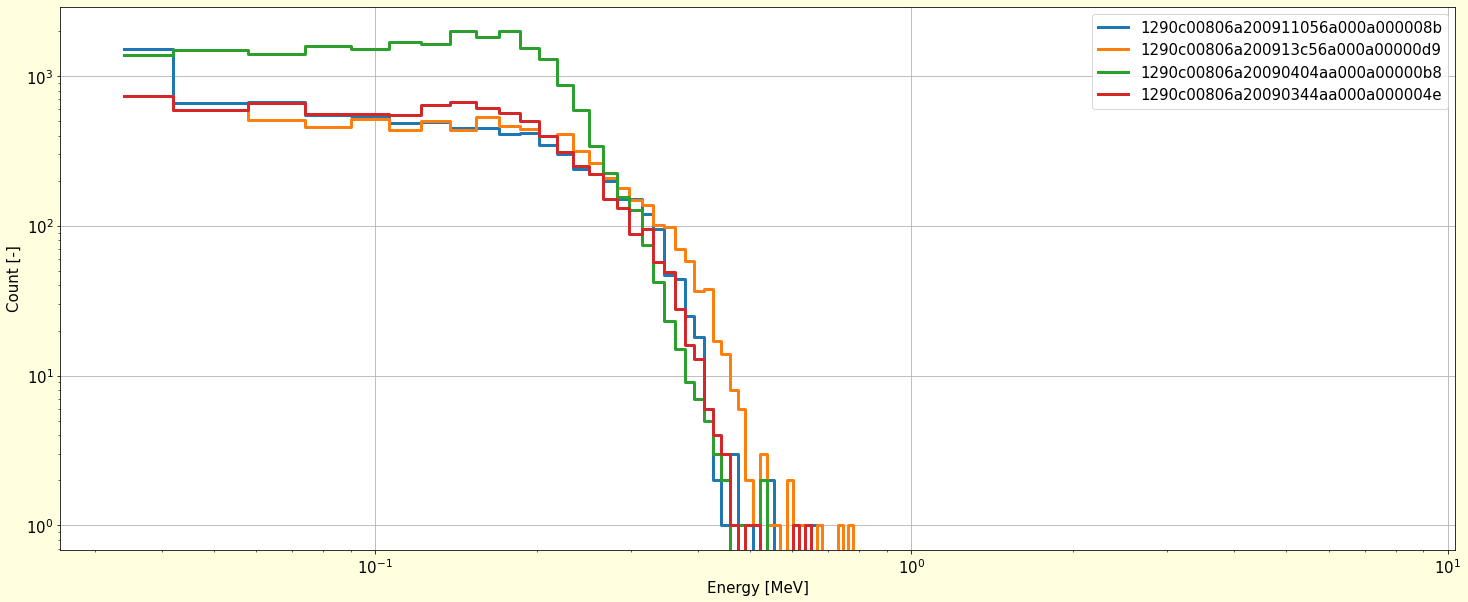

In [61]:
def spectrum(file, start):
    end = start+100
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)

    FIRST_CHANNEL = 9

    ener = df.iloc[start:end].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()

spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT',590) # 420, 590
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT',510) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT',300) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT',410) # 410, 570

plt.legend()



/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT
0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT
0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT
0.034 0.016
/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT
0.034 0.016


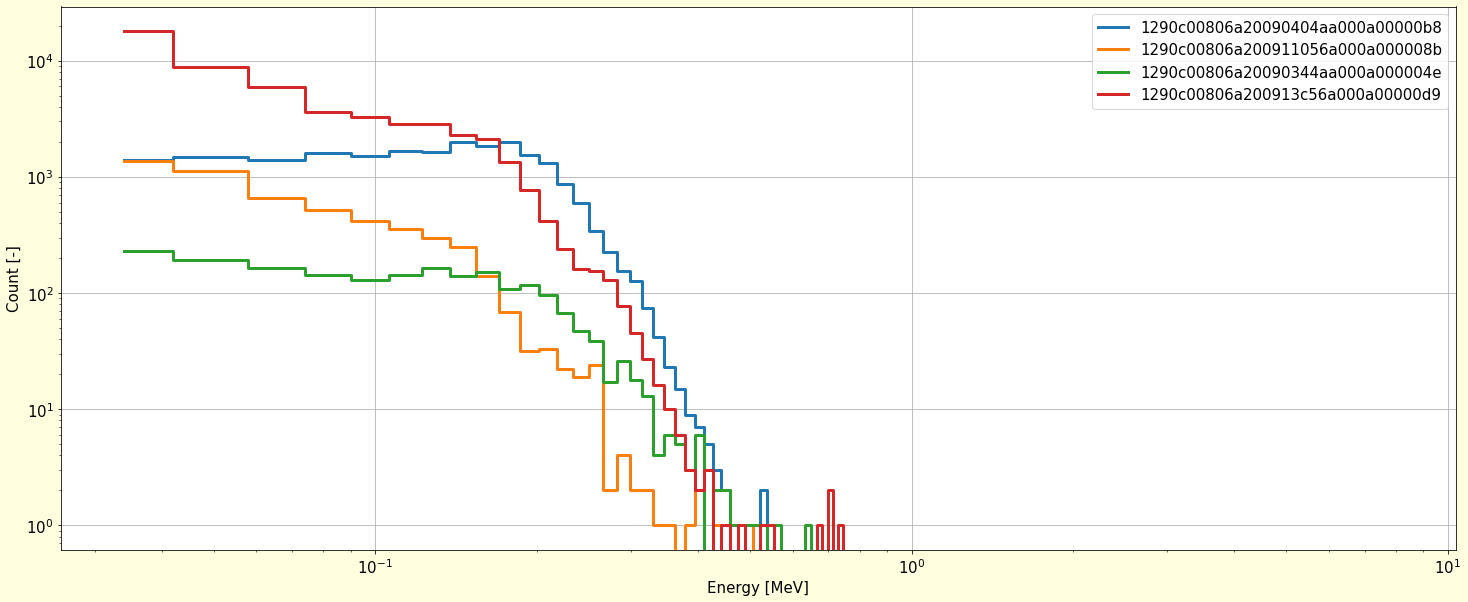

In [34]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    #df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    rc = df.copy()
    
    
    FIRST_CHANNEL = 9

    #ener = rc.iloc[:,FIRST_CHANNEL:500].sum()
    ener = rc.iloc[300:400].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [35]:
rc.iloc[300:400]

0    1        2      3    4   5      6        7       8      9    ...  \
300  $HIST   50   551.39  20506  521  75  13769   9832.0  1380.0  175.0  ...   
301  $HIST   51   562.22  20431  538  80  13221  10401.0  1412.0  190.0  ...   
302  $HIST   52   573.30  20379  522  66  13171  10484.0  1461.0  175.0  ...   
303  $HIST   53   583.83  20496  516  80  13521  10098.0  1372.0  159.0  ...   
304  $HIST   54   594.64  20539  573  95  13825   9734.0  1317.0  196.0  ...   
..     ...  ...      ...    ...  ...  ..    ...      ...     ...    ...  ...   
395  $HIST  145  1578.41  20370  529  66  12971  10633.0  1514.0  178.0  ...   
396  $HIST  146  1589.25  20415  540  75  13270  10344.0  1439.0  181.0  ...   
397  $HIST  147  1600.60  20369  554  65  12876  10730.0  1489.0  202.0  ...   
398  $HIST  148  1610.87  20389  546  48  12807  10819.0  1474.0  184.0  ...   
399  $HIST  149  1621.68  20380  548  57  12954  10685.0  1459.0  198.0  ...   

     495  496  497  498  499  500  501  502  503  504  
300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
302  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
303  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
304  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
395  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
398  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
399  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[100 rows x 505 columns]